In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [4]:
iris = load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


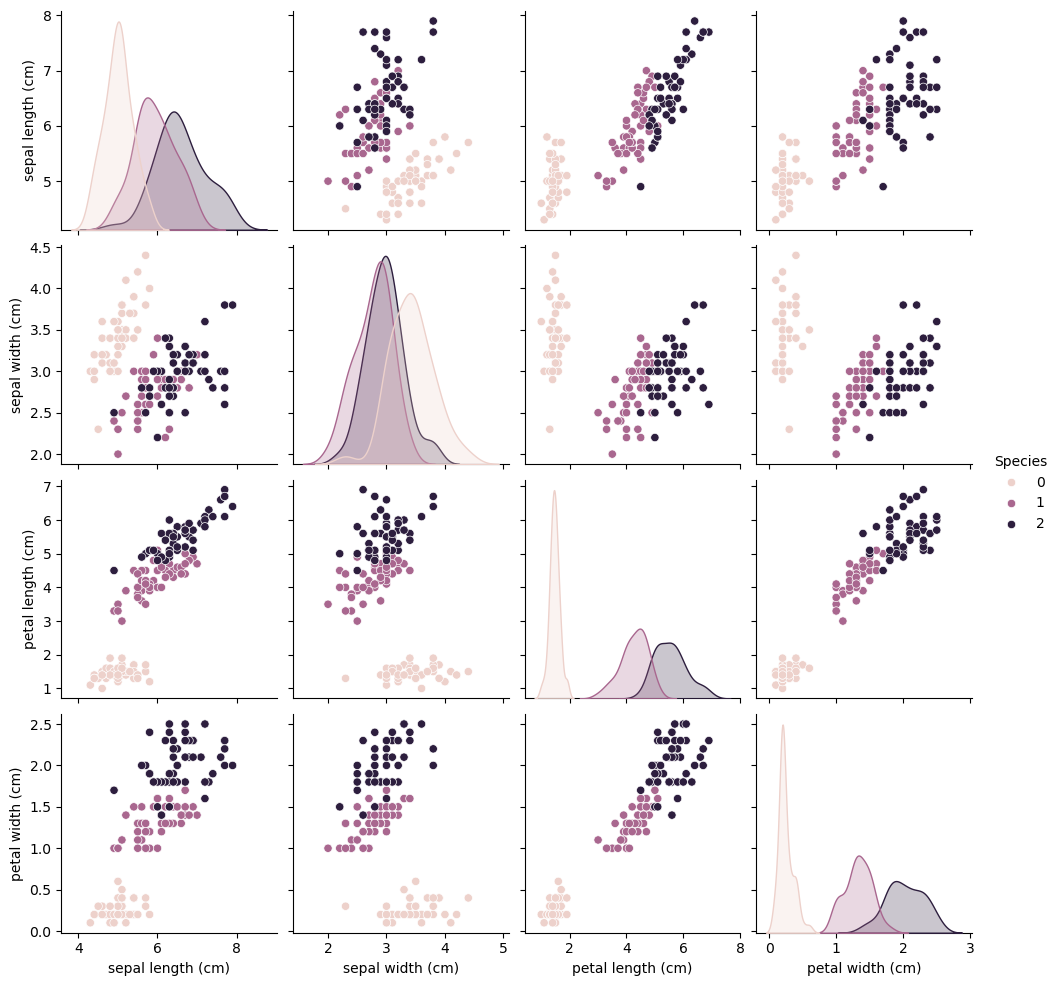

In [5]:
print(df.isnull().sum())

sns.pairplot(df, hue='Species')
plt.show()

In [6]:
X = iris.data
y=iris.target
print(X.shape[0])

150


In [7]:
print(X[:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=47)

In [11]:
from sklearn.tree import DecisionTreeClassifier


In [17]:
clf = DecisionTreeClassifier(criterion='entropy')

In [19]:
clf.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy')

In [21]:
y_pred = clf.predict(X_test)

In [23]:
train_accuracy = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
test_accuracy = accuracy_score(y_test,y_pred)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

print(classification_report(y_test,y_pred))


Train Accuracy: 100.00%
Test Accuracy: 96.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [25]:
con_matrix = confusion_matrix(y_test,y_pred)
print("confusion Matrix:", con_matrix)

confusion Matrix: [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]


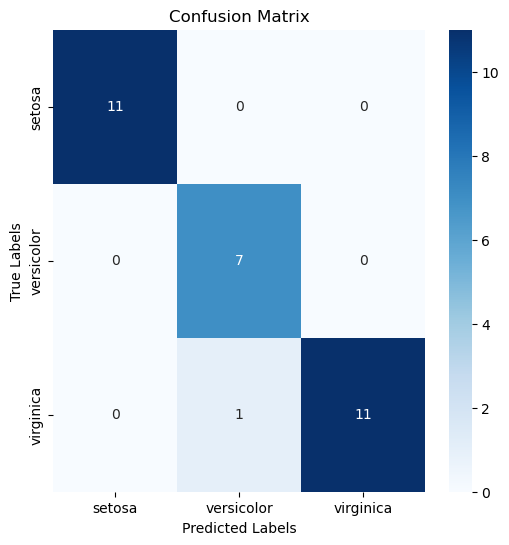

In [27]:
plt.figure(figsize=(6,6))

sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

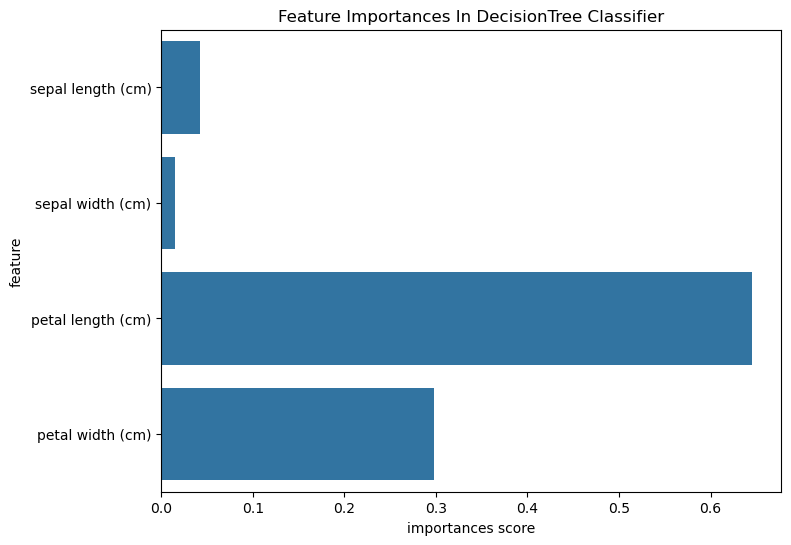

In [29]:
importances = clf.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8,6))
sns.barplot(x = importances, y = features)
plt.xlabel("importances score")
plt.ylabel("feature")
plt.title("Feature Importances In DecisionTree Classifier")
plt.show()

In [31]:
clf_tunned = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=3, min_samples_split=50, max_depth=2)
clf_tunned.fit(X_train,y_train)
y_test_after_tunning=clf_tunned.predict(X_test)

Training accuracy:, 96.67%
Test accuracy:, 100.00%
Classifcation Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

COnfusion Matrix: [[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]


Text(0.5, 1.0, 'COnfusion Matrix')

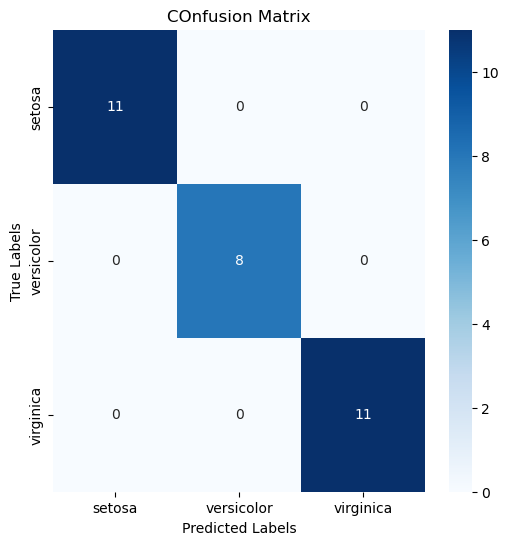

In [33]:
train_accuracy = accuracy_score(y_test,y_pred)
print(f"Training accuracy:, {train_accuracy * 100:.2f}%")

test_accuracy = accuracy_score(y_test_after_tunning,y_pred)
print(f"Test accuracy:, {test_accuracy*100:.2f}%")

print("Classifcation Report:", classification_report(y_test_after_tunning, y_pred))

con_matrix = confusion_matrix(y_test_after_tunning, y_pred)
print("COnfusion Matrix:", con_matrix)

plt.figure(figsize=(6,6))
sns.heatmap(con_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("COnfusion Matrix")

In [37]:
new_data1 = np.array([[5.0, 3.5,1.3,0.5]])
prediction1 = clf_tunned.predict(new_data1)
predicted_class1 = iris.target_names[prediction1[0]]
print(f"Predicted Class for New Data: {predicted_class1}")

Predicted Class for New Data: setosa


Task1 : Predict and show result
Predict for input : 6.0, 2.9, 4.5, 1.5 Predict for input : 6.8, 3.0, 5.5, 2.1

In [40]:
new_data2 = np.array([[6.0,2.9,4.5,1.5]])
prediction2 = clf_tunned.predict(new_data2)
predicted_class2= iris.target_names[prediction2[0]]
print(f"Predicted Class For New Data: {predicted_class2}")

Predicted Class For New Data: versicolor


In [42]:
new_data3 = np.array([[6.8, 3.0, 5.5, 2.1]])
prediction3 = clf_tunned.predict(new_data3)
predicted_class3= iris.target_names[prediction3[0]]
print(f"Predicted Class For New Data: {predicted_class3}")

Predicted Class For New Data: virginica


Task2 : Change tunning to and show the result criterion = ‘en-
tropy’,max_leaf_nodes=5,min_samples_split=10, max_depth=None

In [45]:
clf_tunned2 = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, min_samples_split=10, max_depth=None)
clf_tunned2.fit(X_train,y_train)
y_test_after_tunning2 = clf_tunned2.predict(X_test)

Training Accuracy: 96.67%
Test Accuracy: 100.00%
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix:
 [[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]


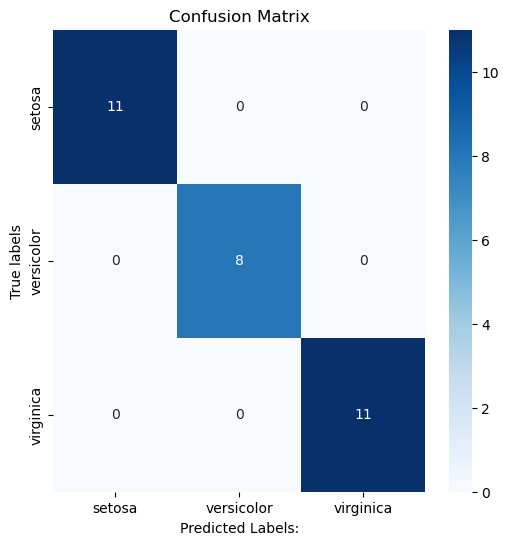

In [61]:
train_accuracy = accuracy_score(y_test,y_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

test_accuracy = accuracy_score(y_test_after_tunning2, y_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

print("classification Report:""\n", classification_report(y_test_after_tunning,y_pred))

conf_matrix = confusion_matrix(y_test_after_tunning,y_pred)
print("Confusion matrix:""\n", conf_matrix)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel("Predicted Labels:")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()